<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/02_Iris%EC%9D%98_%EC%A2%85%EB%A5%98_%EB%B6%84%EB%A5%98(Multiclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris의 종류 분류(Multiclass)

이번에는 Class가 여러개인 데이터를 Logistic Regression으로 예측해 보겠습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Data Load
데이터는 `sklearn.datasets` 의 `load_iris` 함수를 이용해 받을 수 있습니다.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

데이터에서 사용되는 변수는 암술과 수술의 길이와 넓이입니다.
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

정답은 iris 꽃의 종류입니다.

In [ ]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data, target = iris["data"], iris["target"]

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1.2 데이터 EDA

데이터의 분포를 확인하면 다음과 같습니다.

In [ ]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


정답의 종류별 개수는 다음과 같습니다.

In [ ]:
pd.Series(target).value_counts()

2    50
1    50
0    50
dtype: int64

### 1.3 Data Split

데이터를 train과 test로 나누겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [ ]:
print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


Train 데이터의 정답 개수를 보면 아래와 같습니다.

In [ ]:
pd.Series(train_target).value_counts()

2    38
1    34
0    33
dtype: int64

Test 데이터의 정답 개수를 보면 아래와 같습니다.

In [ ]:
pd.Series(test_target).value_counts()

0    17
1    16
2    12
dtype: int64

그런데 단순히 데이터를 분류할 경우 원래 데이터의 target 분포를 반영하지 못합니다.  
이때 사용하는 것이 `startify` 옵션입니다.  
이 옵션에 데이터의 label을 넣어주면 원본 데이터의 정답 분포를 반영해 데이터를 나눠줍니다.

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target
)

In [ ]:
pd.Series(train_target).value_counts()

2    35
1    35
0    35
dtype: int64

In [ ]:
pd.Series(test_target).value_counts()

2    15
1    15
0    15
dtype: int64

## 2. Multiclass

In [ ]:
from sklearn.linear_model import LogisticRegression

시각화를 위해서 Sepal length와 Sepal width만 사용하겠습니다.

In [ ]:
X = train_data[:, :2]

In [ ]:
X[0]

array([5.1, 3.3])

데이터를 시각화하면 다음과 같이 그려집니다.

(1.5, 4.9)

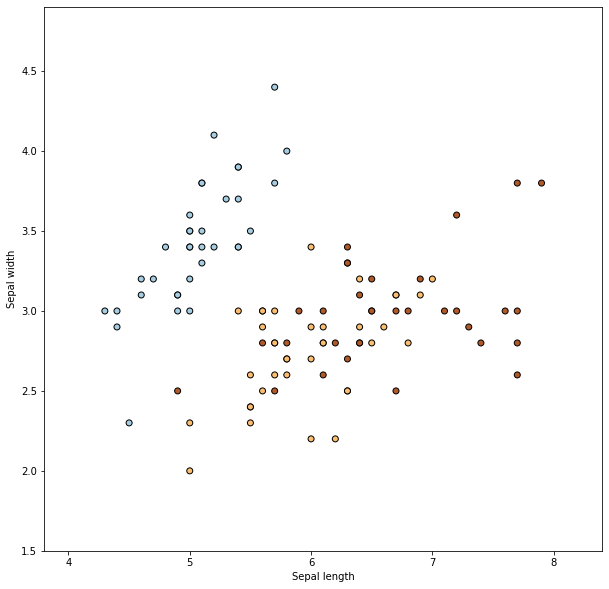

In [ ]:
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=train_target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

### 2.1 One vs Rest

우선 One vs Rest 방법의 Logistic Regression을 학습해 보겠습니다.

In [ ]:
ovr_logit = LogisticRegression(multi_class="ovr")
ovr_logit.fit(X, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

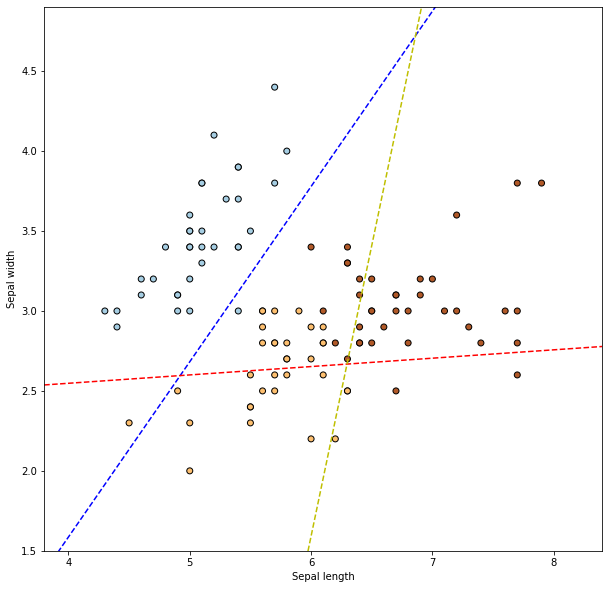

In [ ]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
    plot_hyperplane(i, color)

### 2.2 Multinomial

정답의 분포가 Multinomial 분포를 따른다고 가정한 후 시행하는 Multiclass Logistic Regression 입니다.  
LogisticRegression의 기본 값은 "multinomial" 입니다.

In [ ]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

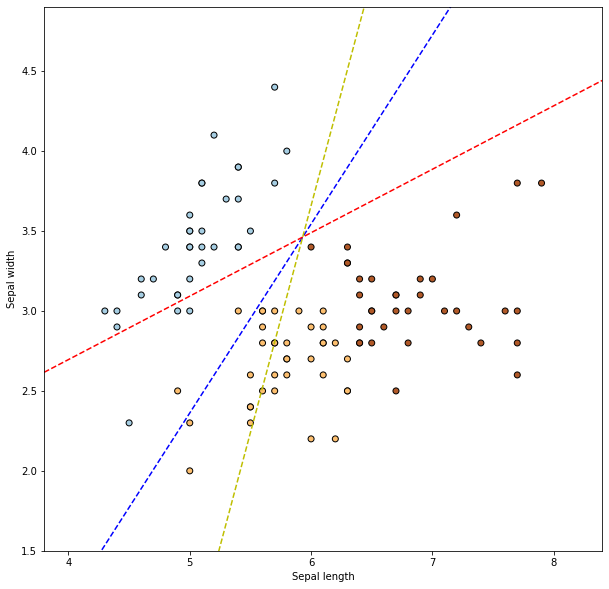

In [ ]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
    plot_hyperplane(i, color)

## 3. Logistic Regression (Multinomial)

In [ ]:
multi_logit = LogisticRegression()

### 3.1 학습

In [ ]:
multi_logit.fit(train_data, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.2 예측

In [ ]:
train_pred_proba = multi_logit.predict_proba(train_data)

In [ ]:
sample_pred = train_pred_proba[0]
sample_pred

array([9.49694515e-01, 5.03040934e-02, 1.39122335e-06])

In [ ]:
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률: 0.0503
class 1과 2에 속할 확률: 0.0503


In [ ]:
train_pred = multi_logit.predict(train_data)
test_pred = multi_logit.predict(test_data)

### 3.3 평가

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [ ]:
print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.91


## 4. Logistic Regression (OVR)

In [ ]:
ovr_logit = LogisticRegression(multi_class="ovr")

### 3.1 학습

In [ ]:
ovr_logit.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.2 예측

In [ ]:
ovr_train_pred = ovr_logit.predict(train_data)
ovr_test_pred = ovr_logit.predict(test_data)

### 3.3 평가

In [ ]:
from sklearn.metrics import accuracy_score

ovr_train_acc = accuracy_score(train_target, ovr_train_pred)
ovr_test_acc = accuracy_score(test_target, ovr_test_pred)

In [ ]:
print(f"One vs Rest Train accuracy is : {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is : {ovr_test_acc:.2f}")

One vs Rest Train accuracy is : 0.95
One vs Rest Test accuracy is : 0.93
